In [1]:
from zipfile import ZipFile
with ZipFile('advanced-dls-spring-2021.zip', 'r') as archive:
    archive.extractall()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
train_data = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [4]:
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


**Подготовка данных.** Пропуски отсутствуют, категориальные оставляю категориальными, при этом интересно посмотреть матрицу корреляций для числовых признаков с нашей целевой переменнной, использую seaborn.heatmap. Также посмотрю на равномерность распределения категорий для каждого фича.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
for i in df.columns:
    print(sum(df[i].isnull()), end=', ')

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [7]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

<Axes: >

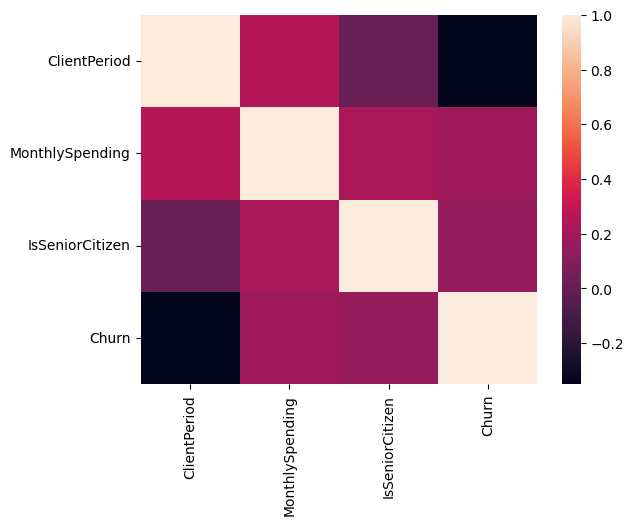

In [8]:
sns.heatmap(df.corr(numeric_only=True))

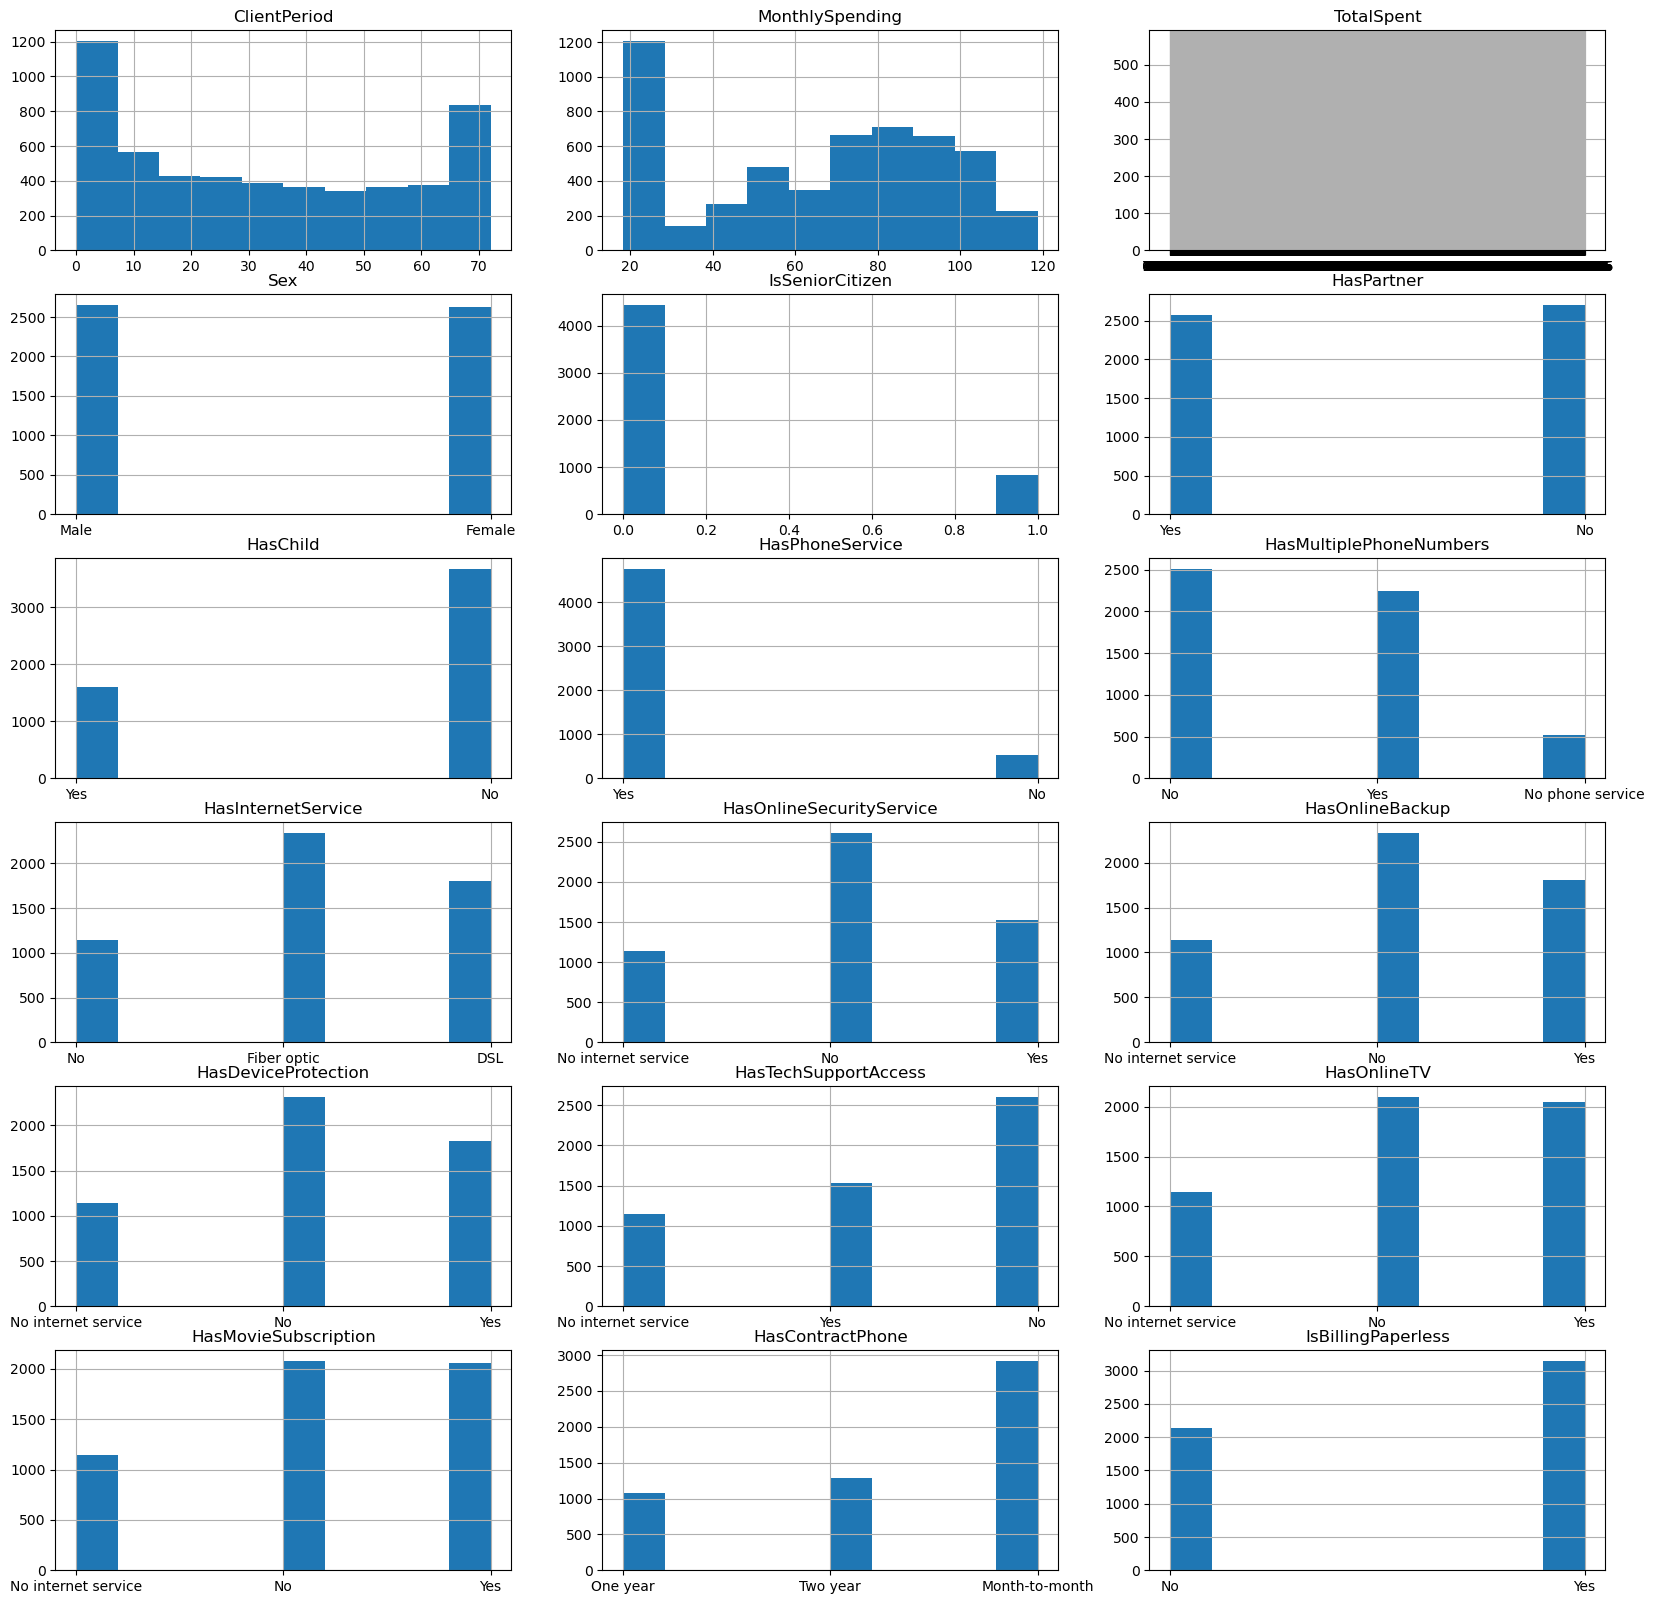

In [9]:
# 6+1 strokes, 3 cols
plt.figure(figsize=(20,20))
for i in range(len(feature_cols)-1):
    plt.subplot(6,3,i+1)
    df[feature_cols[i]].hist()
    plt.title(feature_cols[i])


plt.show()

Text(0.5, 1.0, 'Churn')

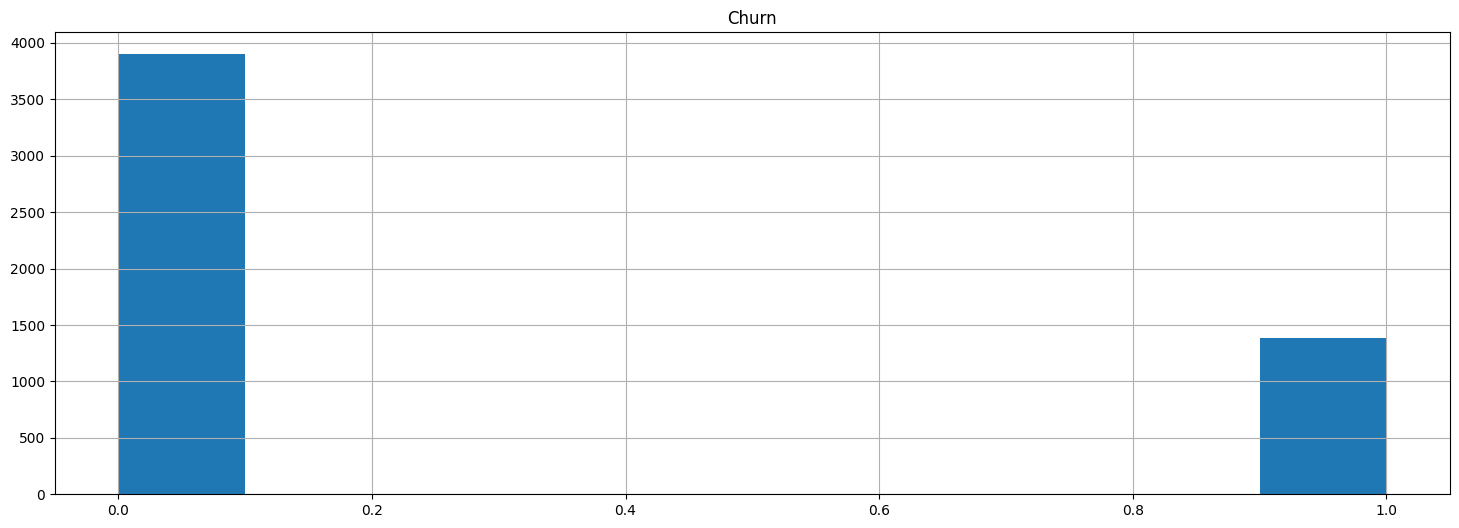

In [9]:
plt.figure(figsize=(18, 6))
df['Churn'].hist()
plt.title('Churn')

In [10]:
df['TotalSpent'].describe()

count     5282
unique    4978
top           
freq         9
Name: TotalSpent, dtype: object

In [11]:
list(df['TotalSpent']).count(' ')

9

случайно заметил, всего 9 строк, но пропущено значение, а при этом за NaN не считается, такого я решил избежать

In [12]:
df = df.loc[df['TotalSpent']!=' ']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlineTV  

In [14]:
for i in feature_cols:
    print(list(df[i]).count(' '))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Видимо единичный случай.

Ладно, вернемся к гистограммам, построены с некоторой задумкой. Читал про несбалансированность классов в задачах классификации в статье по типу [этой](https://loginom.ru/blog/imbalance-class), решил, что полезно было бы хоть отметить что-то подобное в одной из работ, а лучше попробовать разобраться с проблемой, если результат без этих действий меня не устроит. Суть: принял во внимание, что перекос наблюдается в трёх классах (IsSeniorCitizen, HasChild, HasPhoneService, HasMultiplePhoneNumbers, 2 перевес не столь сильно бросается в глаза, его трогать не хочу, а про последние 2 стоит сказать, что они созависимы). Можно будет исправить ситуацию последующим откатом к этому шагу, если результат модели не будет удовлетворительным (сделал бы сразу, но пока не умею)

Помимо фичей, наши целевые классы также не очень сбалансированы (большая гисторамма в конце), это уже большая проблема, ее я хочу решить сразу, нужно только определить метод. Здесь действует правило: "одна ошибка, и ты ошибся", так что сделаю резервную копию и преступаю к изучению методов.

In [15]:
df_copy = df.copy(deep = True)

In [16]:
df = df_copy

Выбранный метод: балансировка с помощью настройки весов (sklearn.utils.class_weight)

In [17]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

y = df['Churn']
data = df.drop(columns = ['Churn'])



'''
Цель - найти параметры, при которых результат будет наилучшим, для этого применяем сплит и взвешивание только на трейн части данных.
После подбора параметров модели обучать конечную модель буду на всём датафрейме, у которого взвешивание пройдет еще раз
Upd: библиотека catboost дает возможность включить трейн-тест внутрь обучения град бустинга, это экономит нервные клетки и строчки кода.
     Хочу воспользоваться готовым решением, а не бить данные вручную. Если результат меня не устроит, или дружбы с технологией не будет, попробую вручную.
'''

'\nЦель - найти параметры, при которых результат будет наилучшим, для этого применяем сплит и взвешивание только на трейн части данных.\nПосле подбора параметров модели обучать конечную модель буду на всём датафрейме, у которого взвешивание пройдет еще раз\nUpd: библиотека catboost дает возможность включить трейн-тест внутрь обучения град бустинга, это экономит нервные клетки и строчки кода.\n     Хочу воспользоваться готовым решением, а не бить данные вручную. Если результат меня не устроит, или дружбы с технологией не будет, попробую вручную.\n'

После многих попыток у меня не получилось подружиться с функцией grid_search из catboost. Ситуация следующая: в сетке парметров я указываю функцию logloss как функцию потерь, но вылетает ошибка, что поиск по мультипарметрической сетке не поддерживает перебор функций потерь. Тогда я ставлю ее в исходные парметры модели, а потом и вовсе не указываю, ошибка вылетает уже по причине того ,что указать ее я должен. Замкнутый круг, не могу додуматься до выхода, сделаю все руками, но мой код оставлю (ниже закомментирован), может, кому-то пригодится, или сам позже найду решение проблемы.

In [18]:
##param_grid = {
##    "iterations": [100,300,500],
##    "depth": depths,
##    "loss_function": 'Logloss', (!!!)
##    "custom_metric": 'AUC',
##    "class_weights": class_weights
##}
##
##model = CatBoostClassifier()
##
##grid_search_result = model.grid_search(param_grid,
##            X=train_dataset,
##            y=None,
##            cv=5,
##            calc_cv_statistics=True,
##            search_by_train_test_split=True,
##            refit=True,
##            shuffle=True,
##            stratified=None,
##            train_size=0.8,
##            verbose=True,
##            plot=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

# Получение весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Создание модели с взвешиванием классов (шпаргалка)
#model = Classifier(class_weight=dict(enumerate(class_weights)))
class_weights = dict(enumerate(class_weights))

train_dataset = Pool(data = X_train,
                     label = y_train,
                     cat_features = cat_cols)
test_dataset = Pool(data = X_test, 
                    label = y_test, 
                    cat_features = cat_cols)

In [26]:
depths = np.arange(3, 17)
iters = np.array([100,300,500])

boosting_metrics = []
for iter in iters:
    for depth in depths:
        params = {"iterations": iter,
                  "depth": depth,
                  "loss_function": "Logloss",
                  #"class_weights": class_weights,
                  "auto_class_weights": "Balanced",
                  "custom_metric": "AUC",
                  "verbose": False}
        scores = cv(params=params, pool=train_dataset, fold_count=5)
        boosting_metrics.append(scores['test-AUC-mean'].values[-1])

Training on fold [0/5]

bestTest = 0.5043617251
bestIteration = 99

Training on fold [1/5]

bestTest = 0.5140040183
bestIteration = 99

Training on fold [2/5]

bestTest = 0.4903640651
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4850227532
bestIteration = 99

Training on fold [4/5]

bestTest = 0.4766308101
bestIteration = 99

Training on fold [0/5]

bestTest = 0.5014811562
bestIteration = 99

Training on fold [1/5]

bestTest = 0.5125215911
bestIteration = 99

Training on fold [2/5]

bestTest = 0.4873946215
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4854743627
bestIteration = 99

Training on fold [4/5]

bestTest = 0.4713360445
bestIteration = 99

Training on fold [0/5]

bestTest = 0.5017290306
bestIteration = 98

Training on fold [1/5]

bestTest = 0.5091539249
bestIteration = 98

Training on fold [2/5]

bestTest = 0.4877485562
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4830784694
bestIteration = 99

Training on fold [4/5]

bestTest = 0.4710156051


Спустя очень длительное время выведем аналитику наших гиперпараметров в график. Кстати, сделанный мной словарик с весами классов не хочет засчитываться (вылетает ошибка), нашёл строчку с автовзвешиванием - полезно

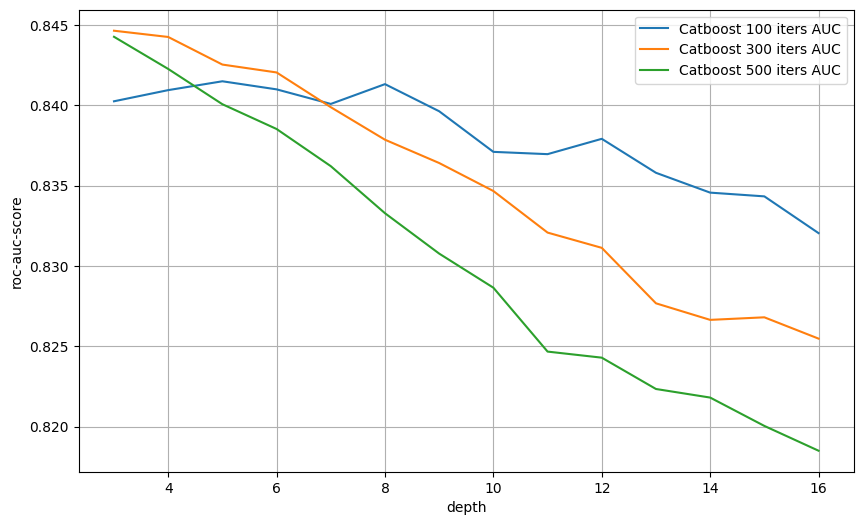

In [27]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(3, 17), boosting_metrics[:14], label='Catboost 100 iters AUC')
plt.plot(np.arange(3, 17), boosting_metrics[14:28], label='Catboost 300 iters AUC')
plt.plot(np.arange(3, 17), boosting_metrics[28:42], label='Catboost 500 iters AUC')
plt.xlabel('depth')
plt.ylabel('roc-auc-score')
plt.grid()
plt.legend()

In [30]:
for i in range(3, 17):
    print("depth = %s | AUC_ROC = %s" % (str(i)+''*(15-len(str(i))), boosting_metrics[i-3]))
print('\n')
for i in range(3, 17):
    print("depth = %s | AUC_ROC = %s" % (str(i)+''*(15-len(str(i))), boosting_metrics[i-3+14]))
print('\n')
for i in range(3, 17):
    print("depth = %s | AUC_ROC = %s" % (str(i)+''*(15-len(str(i))), boosting_metrics[i-3+14]))

depth = 3 | AUC_ROC = 0.8402437772628829
depth = 4 | AUC_ROC = 0.840938542459979
depth = 5 | AUC_ROC = 0.8414888666392543
depth = 6 | AUC_ROC = 0.8409859025266563
depth = 7 | AUC_ROC = 0.8400791556525065
depth = 8 | AUC_ROC = 0.8413109494971724
depth = 9 | AUC_ROC = 0.8396230329559075
depth = 10 | AUC_ROC = 0.8370967671327503
depth = 11 | AUC_ROC = 0.8369542021184284
depth = 12 | AUC_ROC = 0.8379083328996405
depth = 13 | AUC_ROC = 0.8357943039288879
depth = 14 | AUC_ROC = 0.8345597048927408
depth = 15 | AUC_ROC = 0.8343271539694106
depth = 16 | AUC_ROC = 0.8320400281802616


depth = 3 | AUC_ROC = 0.844634911820827
depth = 4 | AUC_ROC = 0.8442464095721091
depth = 5 | AUC_ROC = 0.8425285139421298
depth = 6 | AUC_ROC = 0.8420383734292347
depth = 7 | AUC_ROC = 0.8398764748076477
depth = 8 | AUC_ROC = 0.8378524876289404
depth = 9 | AUC_ROC = 0.8364023878009311
depth = 10 | AUC_ROC = 0.8346602196257689
depth = 11 | AUC_ROC = 0.8320732780817698
depth = 12 | AUC_ROC = 0.8311237532238429
depth 

Странно, что от увеличения глубины снижается точность модели, но ладно...лучшие результаты - 3 глубина и 300/500 итераций.

Обучу обе, протестирую на тестовой части и попробую случайный лес с OHE и логистическую регрессию также с OHE.

Также хочу посмотреть, что было бы, если веса классов не настраивались.

In [31]:
boosting_metrics_without_class_w=[]
for depth in depths:
        params = {"iterations": 100,
                  "depth": depth,
                  "loss_function": "Logloss",
                  #"class_weights": class_weights,
                  #"auto_class_weights": "Balanced",
                  "custom_metric": "AUC",
                  "verbose": False}
        scores = cv(params=params, pool=train_dataset, fold_count=3)
        boosting_metrics_without_class_w.append(scores['test-AUC-mean'].values[-1])

Training on fold [0/3]

bestTest = 0.4269444117
bestIteration = 99

Training on fold [1/3]

bestTest = 0.4264398861
bestIteration = 99

Training on fold [2/3]

bestTest = 0.4023374943
bestIteration = 99

Training on fold [0/3]

bestTest = 0.426845246
bestIteration = 99

Training on fold [1/3]

bestTest = 0.4270490164
bestIteration = 99

Training on fold [2/3]

bestTest = 0.3998508843
bestIteration = 99

Training on fold [0/3]

bestTest = 0.4246695892
bestIteration = 99

Training on fold [1/3]

bestTest = 0.4269649151
bestIteration = 94

Training on fold [2/3]

bestTest = 0.398577479
bestIteration = 99

Training on fold [0/3]

bestTest = 0.4248193019
bestIteration = 99

Training on fold [1/3]

bestTest = 0.4245195096
bestIteration = 99

Training on fold [2/3]

bestTest = 0.3967226885
bestIteration = 99

Training on fold [0/3]

bestTest = 0.4241751481
bestIteration = 82

Training on fold [1/3]

bestTest = 0.426913579
bestIteration = 98

Training on fold [2/3]

bestTest = 0.3981057876
bes

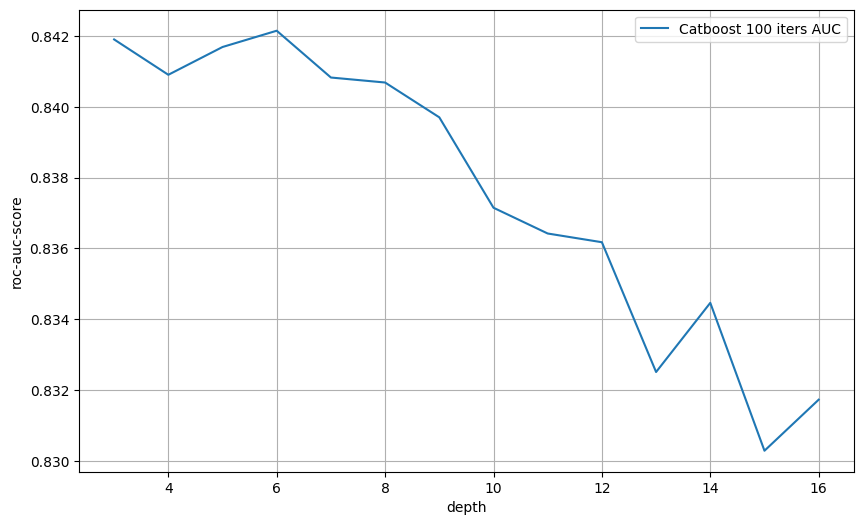

In [32]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(3, 17), boosting_metrics_without_class_w, label='Catboost 100 iters AUC')
plt.xlabel('depth')
plt.ylabel('roc-auc-score')
plt.grid()
plt.legend()

Качество хуже, но есть пик, который стоит проверить на тесте. 100/300 итераций, 6 глубина без классового взвешивания

И того 4 модели градиентного бустинга, называть буду так:
1) model1 - с взвешиванием, 300 итераций, глубина 3
2) model2 - с взвешиванием, 500 итераций, глубина 3
3) model3 - без взвешивания, 100 итераций, глубина 6
4) model4 - без взвешивания, 300 итераций, глубина 6

Сначала обучу на X_train, проверю на X_test (хочу протестировать их и отправить сначала только лучшие). Дальше обучу на всем датафрейме. Предсказания сдаю на каггл.

In [20]:
from sklearn.metrics import roc_auc_score

model1 = CatBoostClassifier(
    iterations = 300,
    depth = 3,
    loss_function = "Logloss",
    auto_class_weights = "Balanced",
    custom_metric = "AUC",
    verbose = False
)
model2 = CatBoostClassifier(
    iterations = 500,
    depth = 3,
    loss_function = "Logloss",
    auto_class_weights = "Balanced",
    custom_metric = "AUC",
    verbose = False
)
model3 = CatBoostClassifier(
    iterations = 100,
    depth = 6,
    loss_function = "Logloss",
    custom_metric = "AUC",
    verbose = False
)
model4 = CatBoostClassifier(
    iterations = 300,
    depth = 6,
    loss_function = "CrossEntropy",
    custom_metric = "AUC",
    verbose = False
)

model1.fit(train_dataset)
train_y_pred = model1.predict_proba(train_dataset)
test_y_pred = model1.predict_proba(test_dataset)
train_auc_1 = roc_auc_score(y_train, train_y_pred[:,1])
test_auc_1 = roc_auc_score(y_test, test_y_pred[:,1])
print('Model 1` results (train and test AUC):', train_auc_1, test_auc_1)

model2.fit(train_dataset)
train_y_pred = model2.predict_proba(train_dataset)
test_y_pred = model2.predict_proba(test_dataset)
train_auc_2 = roc_auc_score(y_train, train_y_pred[:,1])
test_auc_2 = roc_auc_score(y_test, test_y_pred[:,1])
print('Model 2` results (train and test AUC):', train_auc_2, test_auc_2)

model3.fit(train_dataset)
train_y_pred = model3.predict_proba(train_dataset)
test_y_pred = model3.predict_proba(test_dataset)
train_auc_3 = roc_auc_score(y_train, train_y_pred[:,1])
test_auc_3 = roc_auc_score(y_test, test_y_pred[:,1])
print('Model 3` results (train and test AUC):', train_auc_3, test_auc_3)

model4.fit(train_dataset)
train_y_pred = model4.predict_proba(train_dataset)
test_y_pred = model4.predict_proba(test_dataset)
train_auc_4 = roc_auc_score(y_train, train_y_pred[:,1])
test_auc_4 = roc_auc_score(y_test, test_y_pred[:,1])
print('Model 4` results (train and test AUC):', train_auc_4, test_auc_4)

Model 1` results (train and test AUC): 0.8592787956176668 0.8685288693701401
Model 2` results (train and test AUC): 0.8598040831833784 0.8702518108709291
Model 3` results (train and test AUC): 0.8615602383151304 0.8683720222817924
Model 4` results (train and test AUC): 0.8655758950314061 0.8686286811536341


4я модель показывала худший результат, поэтому было принято решение заменить функцию потерь на кросс-энтропию ради интереса. Результат лучше)

In [21]:
full_train_dataset = Pool(data = data,
                     label = y,
                     cat_features = cat_cols)
model1.fit(full_train_dataset)
model2.fit(full_train_dataset)
model3.fit(full_train_dataset)
model4.fit(full_train_dataset)

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [23]:
full_test_dataset = Pool(
    data = train_data,
    cat_features = cat_cols
)

y_pred_to_sub1 = model1.predict(full_test_dataset)
y_pred_to_sub2 = model2.predict(full_test_dataset)
y_pred_to_sub3 = model3.predict(full_test_dataset)
y_pred_to_sub4 = model4.predict(full_test_dataset)

In [24]:
submission.head()

,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [25]:
submission['Churn'] = y_pred_to_sub4
submission.to_csv('submission_gb4.csv', index = None)

На каггл максимальное качество имеет второе предсказание: 0,77009. Такой результат меня не устраивает, буду пытаться ещё. Как минимум, нужно попробовать лес, а, как максимум, почистить данные от отвлекающих фичей (я так прикинул - какая связь вообще между наличием детей у человека и его уходом от компании). Короче говоря, идеи по улучшению ещё есть, буду пробовать.

In [53]:
model_default = CatBoostClassifier()
model_default.fit(full_train_dataset)
y_pred_default = model_default.predict(full_test_dataset)
submission['Churn'] = y_pred_default
submission.to_csv('submission_default.csv', index = None)

Learning rate set to 0.020953
0:	learn: 0.6793849	total: 25.2ms	remaining: 25.1s
1:	learn: 0.6672327	total: 45.7ms	remaining: 22.8s
2:	learn: 0.6541470	total: 73.2ms	remaining: 24.3s
3:	learn: 0.6435950	total: 87ms	remaining: 21.7s
4:	learn: 0.6318339	total: 113ms	remaining: 22.5s
5:	learn: 0.6206491	total: 139ms	remaining: 23.1s
6:	learn: 0.6113165	total: 167ms	remaining: 23.6s
7:	learn: 0.6020884	total: 192ms	remaining: 23.8s
8:	learn: 0.5941477	total: 216ms	remaining: 23.8s
9:	learn: 0.5855317	total: 242ms	remaining: 24s
10:	learn: 0.5788284	total: 255ms	remaining: 23s
11:	learn: 0.5716492	total: 277ms	remaining: 22.8s
12:	learn: 0.5632789	total: 304ms	remaining: 23s
13:	learn: 0.5569611	total: 326ms	remaining: 22.9s
14:	learn: 0.5501845	total: 352ms	remaining: 23.1s
15:	learn: 0.5436848	total: 378ms	remaining: 23.3s
16:	learn: 0.5375987	total: 406ms	remaining: 23.5s
17:	learn: 0.5326550	total: 434ms	remaining: 23.7s
18:	learn: 0.5279704	total: 452ms	remaining: 23.4s
19:	learn: 0.52

попробовал ничего не менять, ну а вдруг)

Результат меня не устраивает, думаю, стоит удалить из нашего датасета признаки, которые не имеют особого влияния на результат, снова обучить catboost,
а также провести поиск параметров для случайного леса поверхностно с помощью RandomSearch, а потом более точно с помощью GridSearch.

Восстановим наш датафрейм и поиграем с признаками и повторами

In [20]:
df = df_copy
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlineTV  

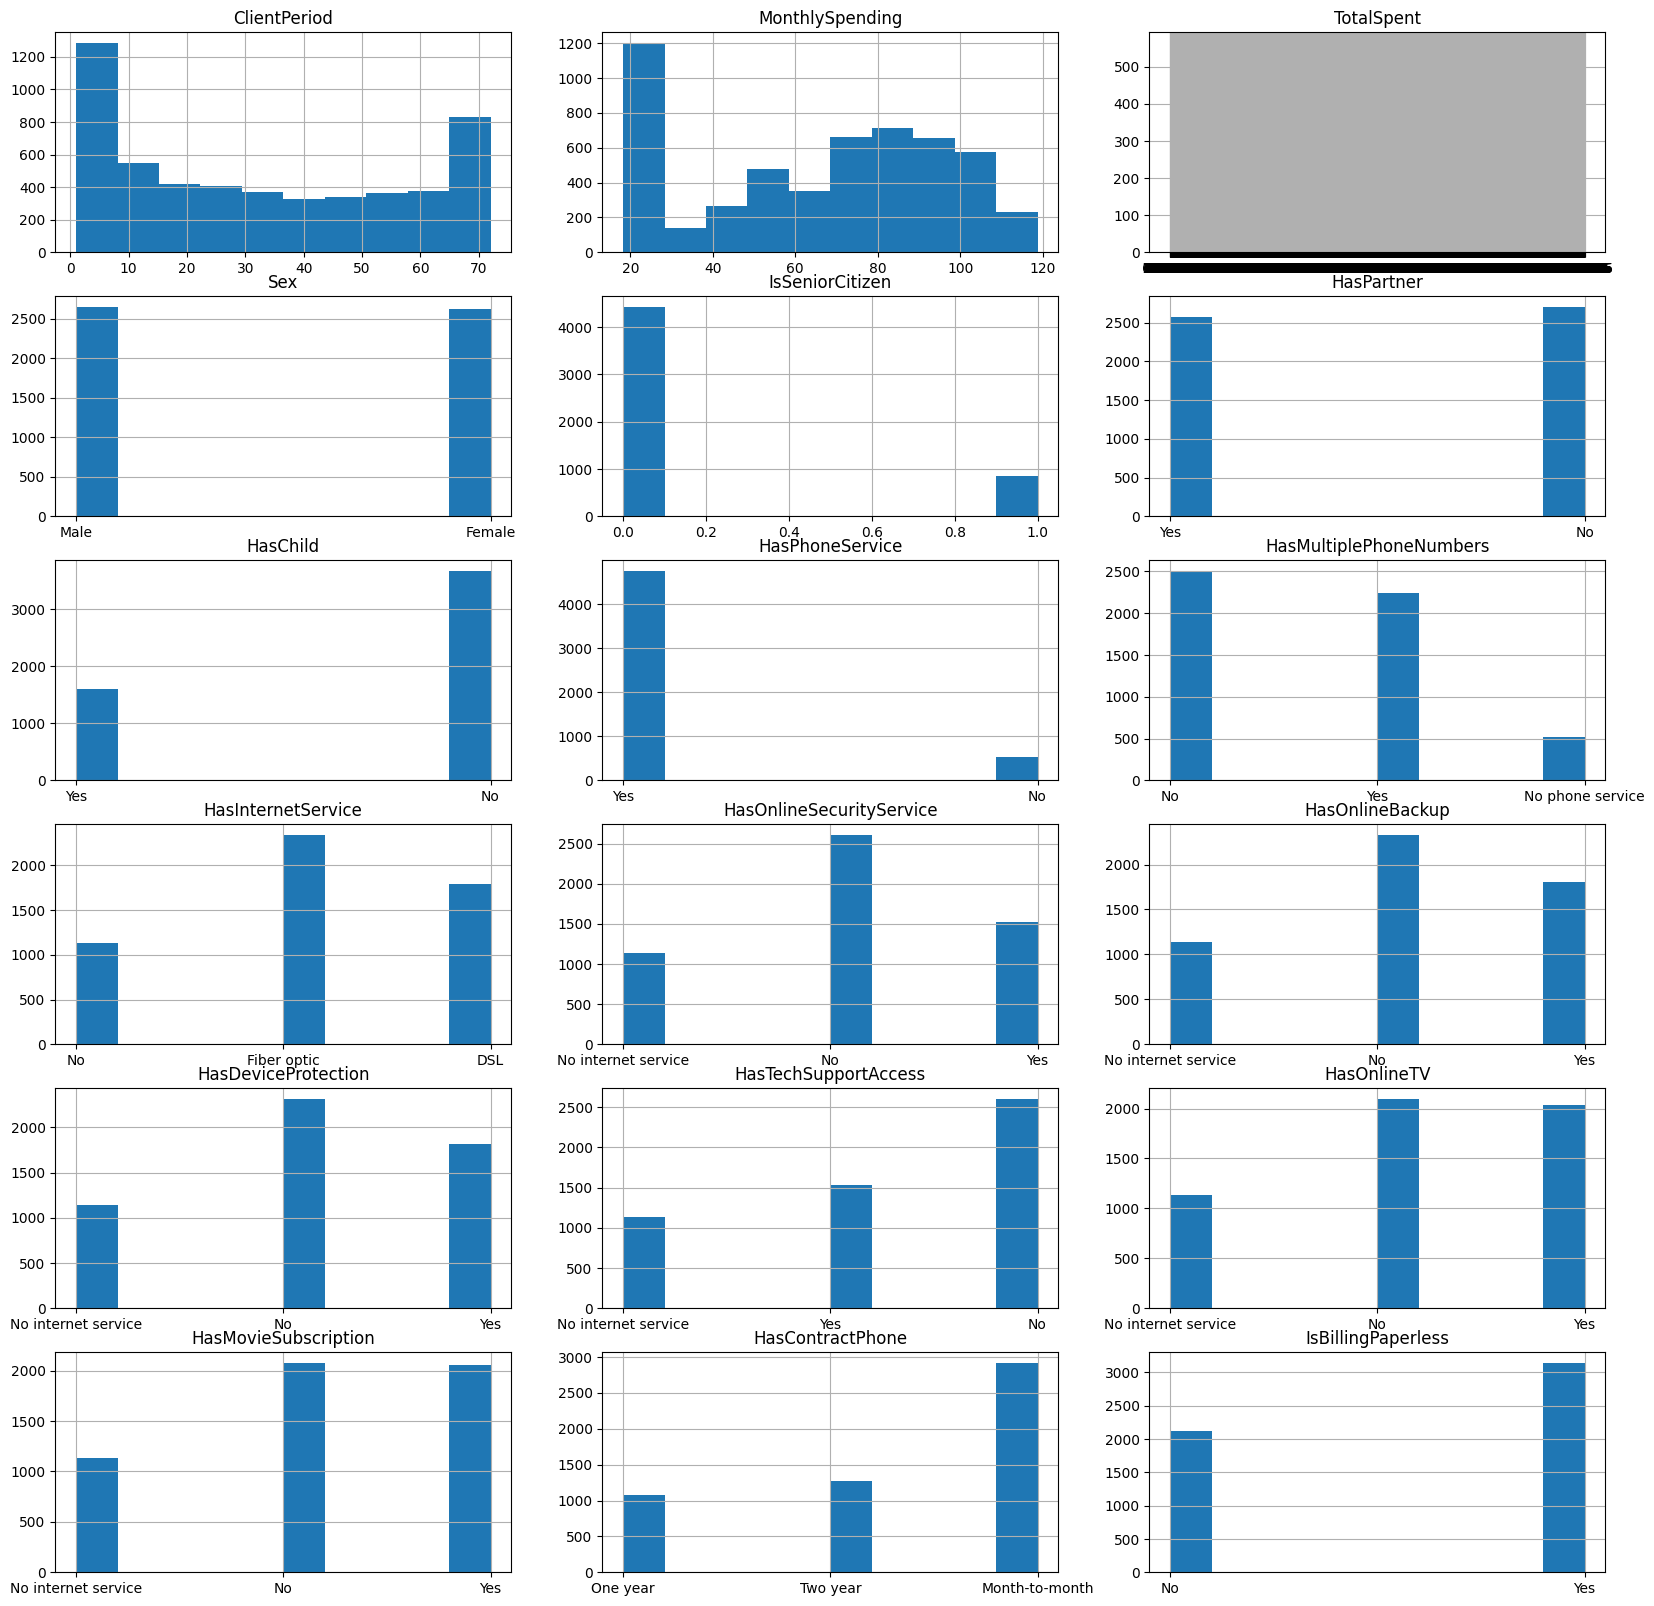

In [21]:
# 6+1 strokes, 3 cols
plt.figure(figsize=(20,20))
for i in range(len(feature_cols)-1):
    plt.subplot(6,3,i+1)
    df[feature_cols[i]].hist()
    plt.title(feature_cols[i])


plt.show()

In [22]:
df=df.drop_duplicates()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5259 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5259 non-null   int64  
 1   MonthlySpending           5259 non-null   float64
 2   TotalSpent                5259 non-null   object 
 3   Sex                       5259 non-null   object 
 4   IsSeniorCitizen           5259 non-null   int64  
 5   HasPartner                5259 non-null   object 
 6   HasChild                  5259 non-null   object 
 7   HasPhoneService           5259 non-null   object 
 8   HasMultiplePhoneNumbers   5259 non-null   object 
 9   HasInternetService        5259 non-null   object 
 10  HasOnlineSecurityService  5259 non-null   object 
 11  HasOnlineBackup           5259 non-null   object 
 12  HasDeviceProtection       5259 non-null   object 
 13  HasTechSupportAccess      5259 non-null   object 
 14  HasOnlineTV  

In [24]:
df["TotalSpent"] = df.TotalSpent.fillna(0).astype(float)

C:\Users\sosno\AppData\Local\Temp\ipykernel_8448\1101715451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalSpent"] = df.TotalSpent.fillna(0).astype(float)


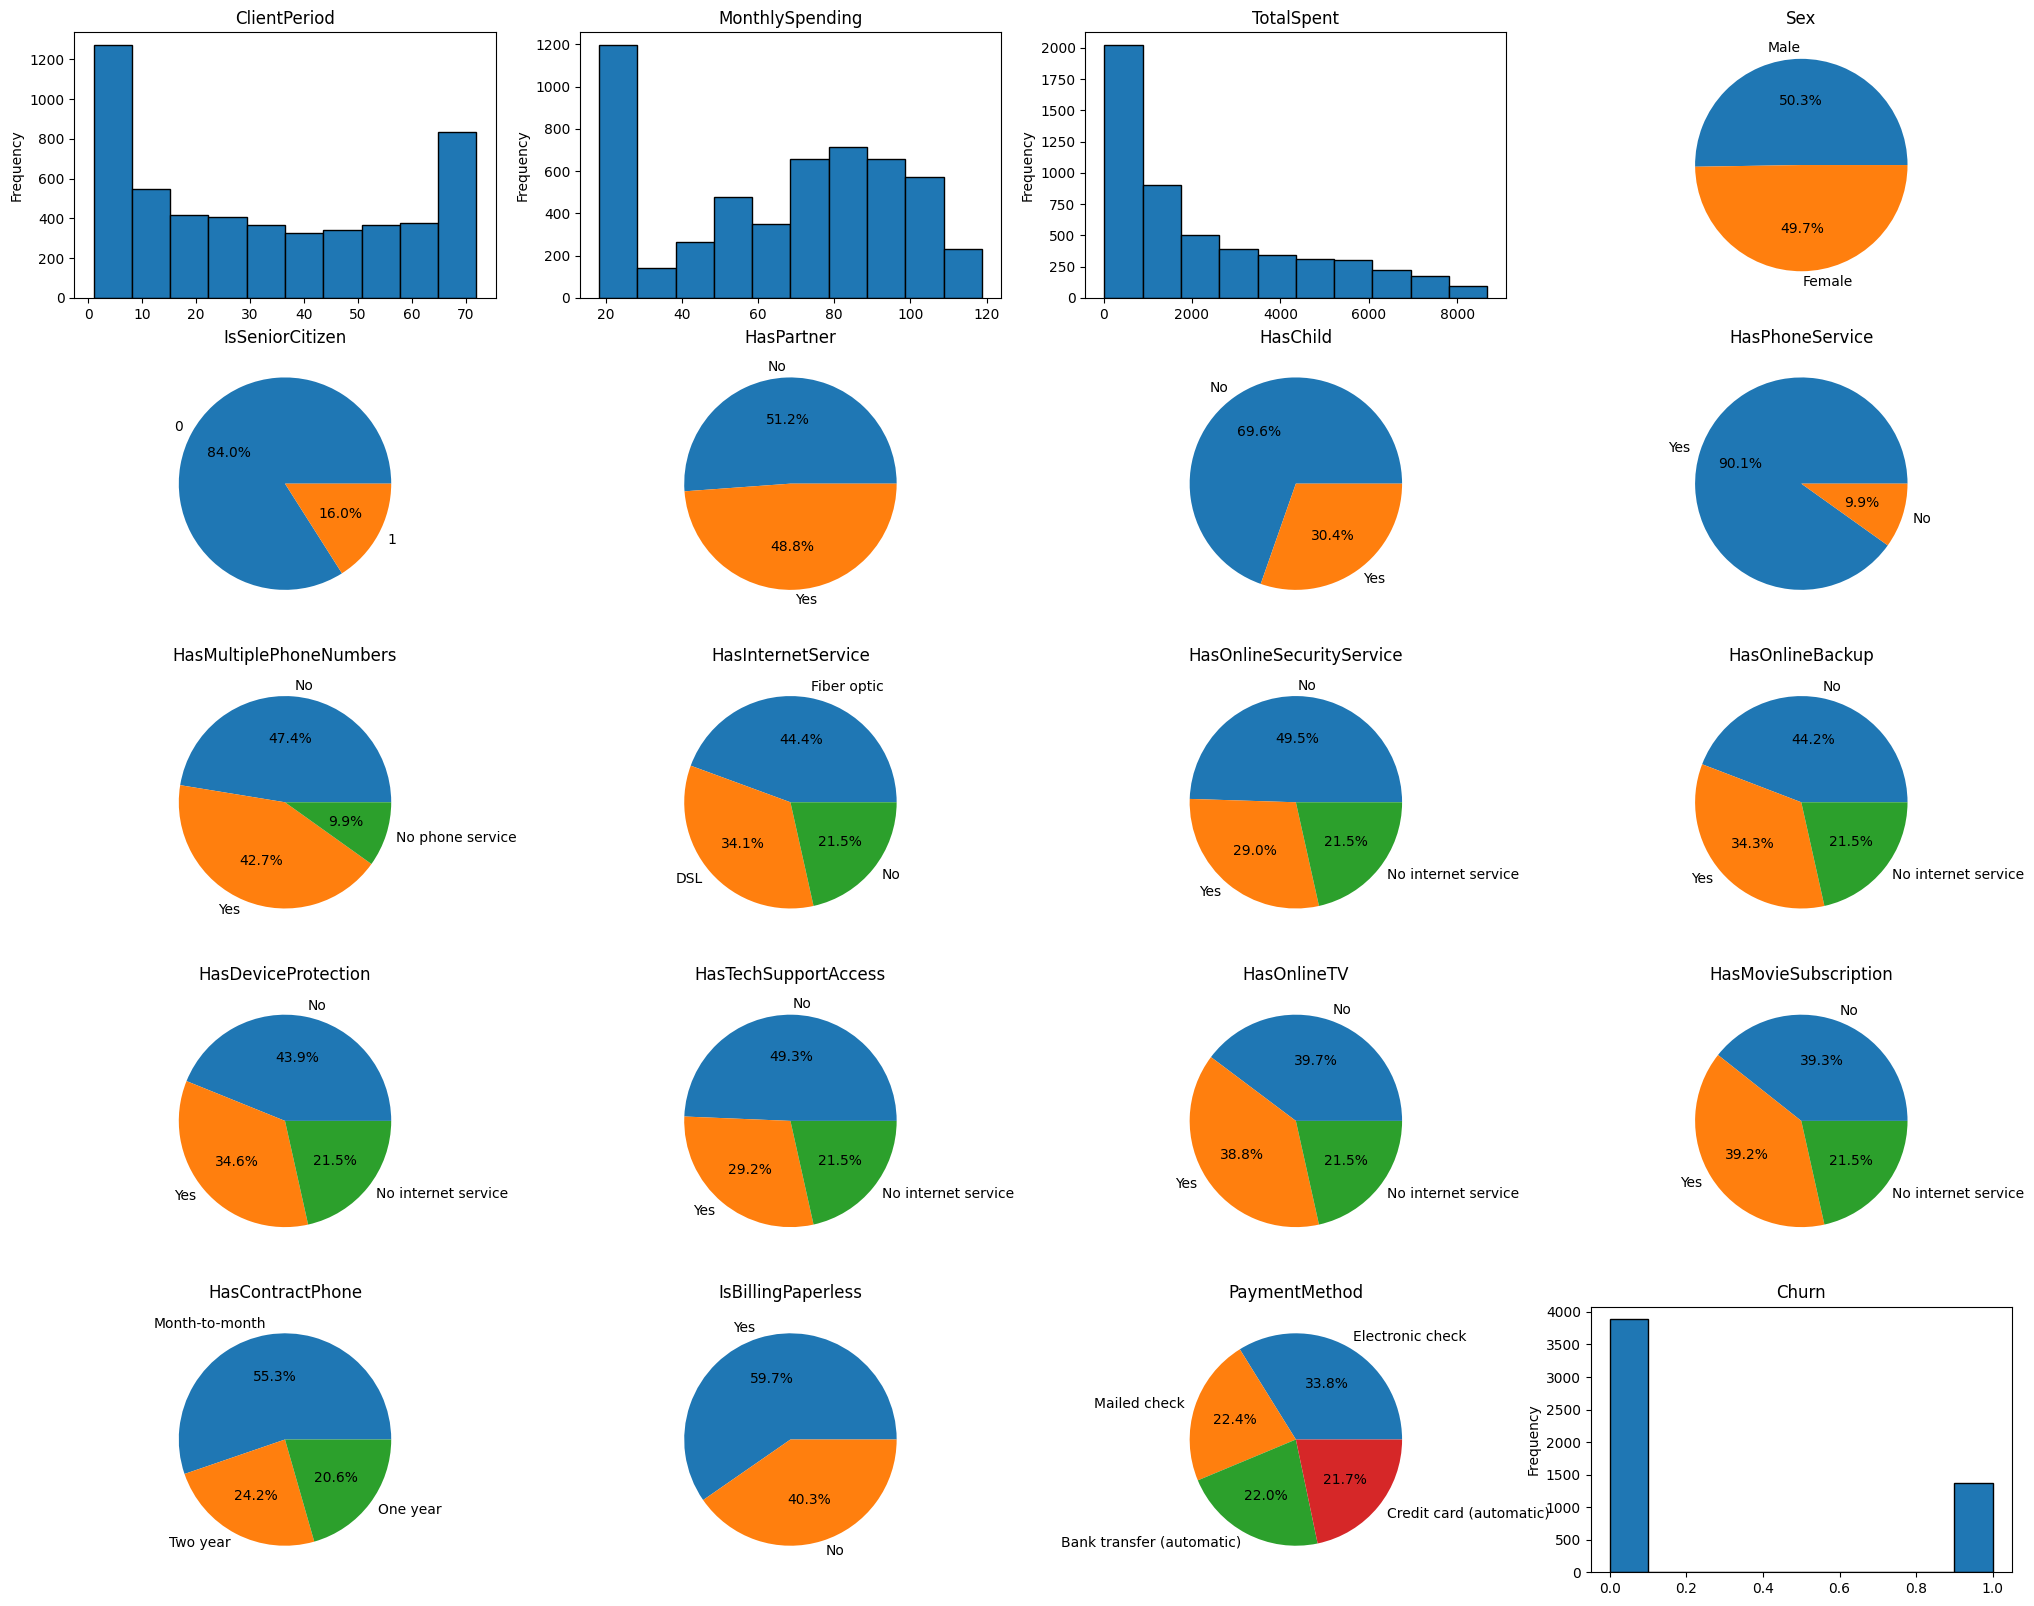

In [25]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for ax, col in zip(axes.flatten(), df.columns):
    ax.set_title(col)
    if col in cat_cols:
        ax.pie(df[col].value_counts(), autopct="%1.1f%%", labels=df[col].value_counts().index)
    else:
        df[col].plot(kind="hist", ec="black", ax=ax)

Объединим No internet service в No. Избыточная информация

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5259 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5259 non-null   int64  
 1   MonthlySpending           5259 non-null   float64
 2   TotalSpent                5259 non-null   float64
 3   Sex                       5259 non-null   object 
 4   IsSeniorCitizen           5259 non-null   int64  
 5   HasPartner                5259 non-null   object 
 6   HasChild                  5259 non-null   object 
 7   HasPhoneService           5259 non-null   object 
 8   HasMultiplePhoneNumbers   5259 non-null   object 
 9   HasInternetService        5259 non-null   object 
 10  HasOnlineSecurityService  5259 non-null   object 
 11  HasOnlineBackup           5259 non-null   object 
 12  HasDeviceProtection       5259 non-null   object 
 13  HasTechSupportAccess      5259 non-null   object 
 14  HasOnlineTV  

In [27]:
df.loc[df['HasMultiplePhoneNumbers'] == 'No phone service', 'HasMultiplePhoneNumbers'] = 'No'

In [28]:
df['HasMultiplePhoneNumbers'].value_counts()

HasMultiplePhoneNumbers
No     3013
Yes    2246
Name: count, dtype: int64

In [29]:
cols_with_no = [
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription'
]

In [30]:
for col in cols_with_no:
    df.loc[df[col] == 'No internet service', col] = 'No'

Проверим

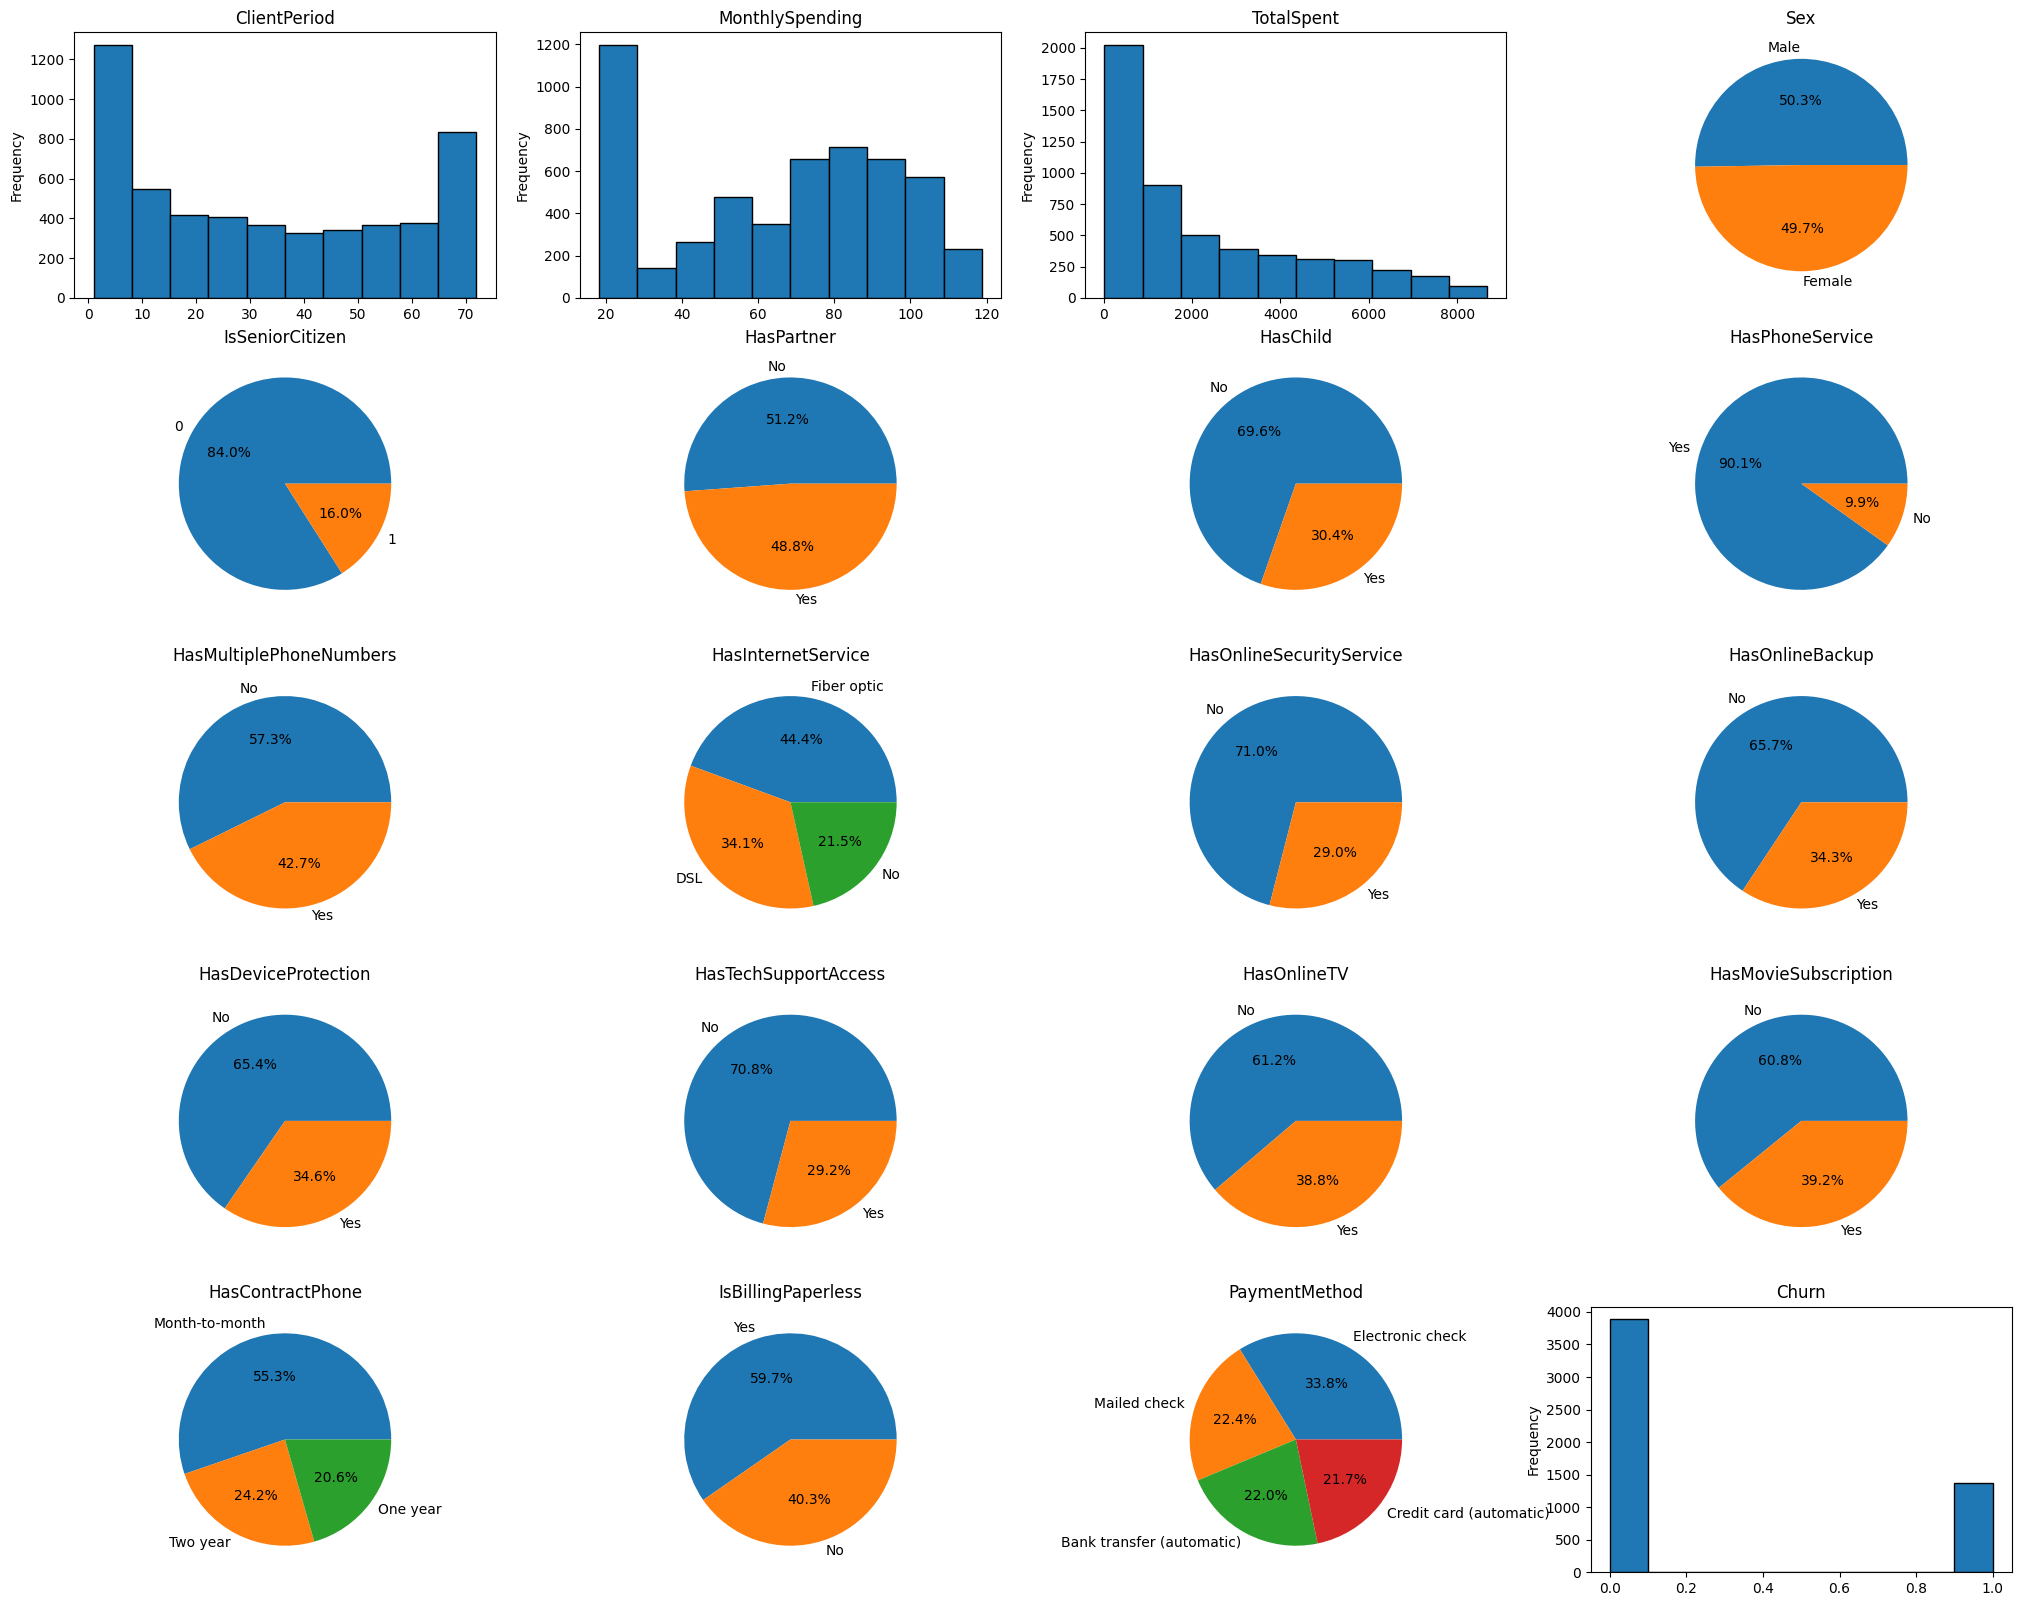

In [31]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for ax, col in zip(axes.flatten(), df.columns):
    ax.set_title(col)
    if col in cat_cols:
        ax.pie(df[col].value_counts(), autopct="%1.1f%%", labels=df[col].value_counts().index)
    else:
        df[col].plot(kind="hist", ec="black", ax=ax)

снова протестируем catboost, затем лес, применим стекинг

In [32]:
y = df['Churn']
X = df.drop(columns=['Churn'])
edited_dataset = Pool(
    data = X,
    label = y,
    cat_features = cat_cols
)

In [33]:
catboost = CatBoostClassifier(
    cat_features=cat_cols,
    eval_metric="AUC:hints=skip_train~false", #посмотрел документацию и туториал
    metric_period=1000,
    random_seed=0,
)
PARAMS = {
"n_estimators": [100, 250, 500],
"learning_rate": [0.001, 0.05, 0.1, 0.5],
"max_depth": np.arange(4, 12, 2)
}
catboost.grid_search(PARAMS, X, y, cv=3, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7619479	test: 0.7505685	best: 0.7505685 (0)	total: 151ms	remaining: 15s
99:	learn: 0.8162377	test: 0.8209337	best: 0.8209337 (99)	total: 1.24s	remaining: 0us

bestTest = 0.8209337405
bestIteration = 99

0:	loss: 0.8209337	best: 0.8209337 (0)	total: 1.26s	remaining: 59.5s
0:	learn: 0.7619479	test: 0.7505685	best: 0.7505685 (0)	total: 10.1ms	remaining: 1s
99:	learn: 0.8588143	test: 0.8441443	best: 0.8441443 (99)	total: 1.24s	remaining: 0us

bestTest = 0.8441442928
bestIteration = 99

1:	loss: 0.8441443	best: 0.8441443 (1)	total: 2.51s	remaining: 57.7s
0:	learn: 0.7619479	test: 0.7505685	best: 0.7505685 (0)	total: 11.4ms	remaining: 1.13s
99:	learn: 0.8686003	test: 0.8421614	best: 0.8421614 (99)	total: 1.21s	remaining: 0us

bestTest = 0.8421613666
bestIteration = 99

2:	loss: 0.8421614	best: 0.8441443 (1)	total: 3.73s	remaining: 55.9s
0:	learn: 0.7619479	test: 0.7505685	best: 0.7505685 (0)	total: 9.95ms	remaining: 985ms
99:	learn: 0.9244064	test: 0.8219172	best: 0.8219172 (99)	

{'params': {'depth': 4, 'learning_rate': 0.05, 'iterations': 250},
 'cv_results': defaultdict(list,
             {'iterations': [0, 249],
              'test-AUC-mean': [0.7682799143497835, 0.8435051395750085],
              'test-AUC-std': [0.005277925563421137, 0.008108636194415906],
              'train-AUC-mean': [0.7759618789094772, 0.8778673011751614],
              'train-AUC-std': [0.0033336424397487543, 0.004016047992334273],
              'test-Logloss-mean': [0.6673075027983391, 0.4154594193444578],
              'test-Logloss-std': [6.838082075112398e-05,
               0.009741746084478543],
              'train-Logloss-mean': [0.6669903634119377, 0.3752381212505222],
              'train-Logloss-std': [0.0007087600543064742,
               0.00606639290467052]})}

In [34]:
print(catboost.get_params())

{'random_seed': 0, 'metric_period': 1000, 'eval_metric': 'AUC:hints=skip_train~false', 'cat_features': ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod'], 'depth': 4, 'learning_rate': 0.05, 'iterations': 250}


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [36]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])
preprocessor = ColumnTransformer(

transformers=[
        ("num", numeric_transformer, num_cols),#делим на числовые
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)#и категориальные, которые преобразуем в числовые через OneHotEncoder
    ]
)

In [37]:
PARAMS = {
    "model__C": np.arange(0.001, 10, 0.1)#ставим диапазон от 0.001 до 100 с шагом 0.1
}
clf = Pipeline(steps=[
    ("preproc", preprocessor),
    ("model", LogisticRegression(solver="saga", max_iter=1000)),
])
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=PARAMS,
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
    refit=True,
)
logreg = grid_search.fit(X, y)

In [38]:
logreg.best_score_

0.8442924388033877

In [39]:
logreg.best_params_

{'model__C': 9.401}

In [40]:
PARAMS = {#параметры для grid search
  "model__n_neighbors": range(1, 50),
  "model__metric": ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan", "nan_euclidean"],
}
clf = Pipeline(steps=[
    ("preproc", preprocessor),
    ("model", KNeighborsClassifier()),
])
grid_search = GridSearchCV(
estimator=clf,
param_grid=PARAMS,
scoring="roc_auc",
n_jobs=-1,
cv=5,
refit=True,
)
knn = grid_search.fit(X, y)

In [41]:
knn.best_score_

0.8344132973622024

In [42]:
knn.best_params_

{'model__metric': 'nan_euclidean', 'model__n_neighbors': 49}

In [43]:
PARAMS = {
    "model__min_samples_split": np.arange(2, 30, 2),
    "model__min_samples_leaf": np.arange(1, 30, 2)
}
clf = Pipeline(steps=[
    ("preproc", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200))
])

grid_search = GridSearchCV(
estimator=clf,
param_grid=PARAMS,
scoring="roc_auc",
n_jobs=-1,
cv=5,
refit=True
)
rf = grid_search.fit(X, y);

In [44]:
rf.best_score_

0.8452162956396533

In [45]:
rf.best_params_

{'model__min_samples_leaf': 23, 'model__min_samples_split': 16}

Stacking

In [46]:
from sklearn.ensemble import StackingClassifier

In [47]:
meta = CatBoostClassifier(
    logging_level='Silent',
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Depthwise",
    l2_leaf_reg=1,
    learning_rate=0.08,
    max_depth=10,
    min_data_in_leaf=10,
    n_estimators=10,
    subsample=0.1
) 
stacking = StackingClassifier(
    estimators=[
        ("logreg", logreg),
        ("knn", knn),
        ("rf", rf),
        ("catboost", catboost),
    ],
    final_estimator=meta,
    n_jobs=-1,
    cv="prefit"
)
stacking.fit(X, y)

StackingClassifier(cv='prefit',
                   estimators=[('logreg',
                                GridSearchCV(cv=5,
                                             estimator=Pipeline(steps=[('preproc',
                                                                        ColumnTransformer(transformers=[('num',
                                                                                                         Pipeline(steps=[('scaler',
                                                                                                                          StandardScaler())]),
                                                                                                         ['ClientPeriod',
                                                                                                          'MonthlySpending',
                                                                                                          'TotalSpent']),
                                                                                                        ('cat',
                                                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                                                         ['Sex',
                                                                                                          'IsSeniorCitizen',
                                                                                                          'HasPartner',
                                                                                                          'HasChild',
                                                                                                          'HasPhoneServ...
                                             n_jobs=-1,
                                             param_grid={'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                                         'model__min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])},
                                             scoring='roc_auc')),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x00000152004AC210>)],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x0000015201823610>,
                   n_jobs=-1)

In [48]:
for i in feature_cols:
    print(list(train_data[i]).count(' '))

0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [50]:
train_data.loc[train_data['TotalSpent']==' ']=0

In [51]:
train_data.loc[train_data['HasMultiplePhoneNumbers'] == 'No phone service', 'HasMultiplePhoneNumbers'] = 'No'
for col in cols_with_no:
    train_data.loc[train_data[col] == 'No internet service', col] = 'No'
train_data["TotalSpent"] = train_data.TotalSpent.fillna(0).astype(float)

In [58]:
preds_from_stacking = stacking.predict_proba(train_data)
submission['Churn'] = preds_from_stacking[:,1]
submission.to_csv('submission_stacking.csv', index = None)

In [63]:
stacking2 = StackingClassifier(
    estimators=[
        ("logreg", logreg),
        ("knn", knn),
        ("rf", rf),
        ("catboost", model2),
    ],
    n_jobs=-1,
    cv="prefit"
)
stacking2.fit(X, y)

StackingClassifier(cv='prefit',
                   estimators=[('logreg',
                                GridSearchCV(cv=5,
                                             estimator=Pipeline(steps=[('preproc',
                                                                        ColumnTransformer(transformers=[('num',
                                                                                                         Pipeline(steps=[('scaler',
                                                                                                                          StandardScaler())]),
                                                                                                         ['ClientPeriod',
                                                                                                          'MonthlySpending',
                                                                                                          'TotalSpent']),
                                                                                                        ('cat',
                                                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                                                         ['Sex',
                                                                                                          'IsSeniorCitizen',
                                                                                                          'HasPartner',
                                                                                                          'HasChild',
                                                                                                          'HasPhoneServ...
                                                                                                          'PaymentMethod'])])),
                                                                       ('model',
                                                                        RandomForestClassifier(n_estimators=200))]),
                                             n_jobs=-1,
                                             param_grid={'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                                         'model__min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])},
                                             scoring='roc_auc')),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x000001520357F090>)],
                   n_jobs=-1)

In [64]:
preds_from_stacking_2 = stacking2.predict_proba(train_data)
submission['Churn'] = preds_from_stacking_2[:,1]
submission.to_csv('submission_stacking_2.csv', index = None)

По итогу, результата выше я получить не смог. Очень жаль, но я узнал много нового. Буду учиться дальше.

In [62]:
model2 = CatBoostClassifier(
    iterations = 500,
    depth = 3,
    loss_function = "Logloss",
    auto_class_weights = "Balanced",
    custom_metric = "AUC",
    verbose = False
)
model2.fit(X,y, cat_features = cat_cols)
submission['Churn'] = model2.predict_proba(train_data)[:,1]
submission.to_csv('submission_killme.csv', index = None)

Лучшее качество после сдачи результатов на странице соревнования составила 0,85308